#### Hi everyone! This kernel aims at showing you a basic approach to our ciphering problem. It shows my way of exploring solutions and I hope it will help you through your discovery of our dataset.

## Imports and data loading

In [1]:
# load the basic librairies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
# load the data
train_df = pd.read_csv("input/train.csv")
test_df = pd.read_csv("input/test.csv")
sub = pd.read_csv("input/sample_submission.csv")

In [3]:
train_df.head(3)

plaintext_id                                               text   index
0  ID_d45641fc3  come, who you are and what you would are out o...  104199
1  ID_2058482ae          For all in vain comes counsel to his ear.   79081
2  ID_5257a6819        Captain: With the next benefit o' the wind.   31234

In [4]:
test_df.head(5)

ciphertext_id                                         ciphertext  difficulty
0  ID_4a6fc1ea9  H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl...           1
1  ID_9460d3380  Ah1QtVkLNcx7Q6mgvleEAqFIzyZoYkVtiKnd2Yy2t2GmoT...           4
2  ID_ac39fd360  BxBYt00fPc5zQqmls1mAFrVIzihsdFdoiKjdzZ22tWOnoT...           4
3  ID_d089e3234  AxFVtU0YMcl6R6mlvFKNFbVNziNpYkNtjKLX2Y+wsWShoT...           4
4  ID_55f57ffd0  11241 14155 31264 11448 35128 46135 39409 3201...           3

In [5]:
# first feature: create a 'length' column
train_df['length'] = train_df.text.apply(len)
test_df['length'] = test_df.ciphertext.apply(len)


# filter the test dataframes by cypher level
df_level_1 = test_df[test_df.difficulty==1].copy()
df_level_2 = test_df[test_df.difficulty==2].copy()
df_level_3 = test_df[test_df.difficulty==3].copy()
df_level_4 = test_df[test_df.difficulty==4].copy()

df_level_1.head(3)

ciphertext_id                                         ciphertext  \
0   ID_4a6fc1ea9  H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl...   
5   ID_c85d54d74  Pv4n2iv9M[[I39w5dBz'YURX-R-CIopea, adeld Sirsa...   
19  ID_a6298da09  0W,jz:pH(z9xIENX5o[VM,!zma)]P5M rydi dnf bwhfl...   

    difficulty  length  
0            1     100  
5            1     100  
19           1     100

## Sort of Exploratory Data Analysis

In [6]:
print('train_df.shape:', train_df.shape, '\ntest_df.shape:', test_df.shape)

train_df.shape: (108755, 4) 
test_df.shape: (108755, 4)


### To be familiar with the data, let's look at it first!

### Original text

In [7]:
for i in range(5):
    print(train_df.text[i], '\n')

come, who you are and what you would are out of my 

For all in vain comes counsel to his ear. 

Captain: With the next benefit o' the wind. 

Smells wooingly here: no jutty, frieze, 

PORTIA: Which did incorporate and make us one, 



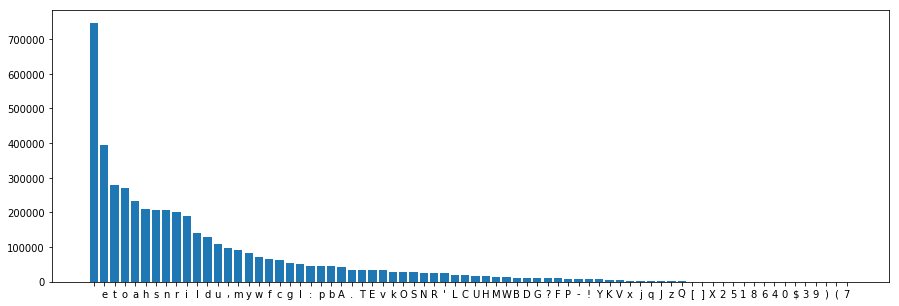

In [8]:
plain_char_cntr = Counter(''.join(train_df['text'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values)
plt.xticks(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Letter'].values)
plt.show()

The most frequent letters in English are 'e', 't', 'a', 'o', 'n', 'i' and 's' so that's quite consistant!

### Ciphered text level 1

In [9]:
for i in range(20):
    try:
        print(df_level_1.ciphertext[i], '\n')
    except KeyError:
        pass

H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl, eq pvt sssid elede btqp sbcly)hVJ9M41hVpx4fKh!vG)-Fh 

Pv4n2iv9M[[I39w5dBz'YURX-R-CIopea, adeld Sirsav: md lvt lggw cppxfsxtc.83 !NWeC xTrHd,7X:X)937$zf,(P 

0W,jz:pH(z9xIENX5o[VM,!zma)]P5M rydi dnf bwhfltq, qsh H miv ma jpuayh,,(Fb0gO5T]q.q4T3bt$5aJK1$)plKq 



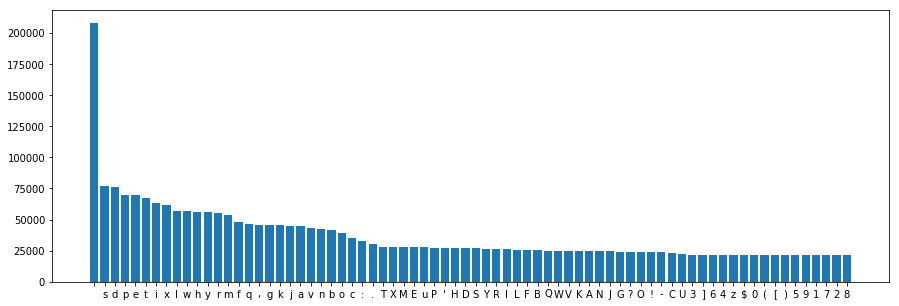

In [10]:
plain_char_cntr = Counter(''.join(df_level_1['ciphertext'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values)
plt.xticks(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Letter'].values)
plt.show()

Compared to the previous level, we see that there are far less differences in terms of caracters frequence that in plain English...

### Ciphered text level 2

In [11]:
for i in range(30):
    try:
        print(df_level_2.ciphertext[i], '\n')
    except KeyError:
        pass

1 !hek]zAxsAsD k!CN, pJlxvmQ[gpmQ'Av.m] tdI,: hOVPsp9fPsj5PAi fkH pywLsq'vRdph87h t1!myOTObapB),xTq  

CiHPe hT, o6JSidir)nsWJVds1id hnpeirv:AMeYUd]b,BCC U3Wjnpdpmqp)', pvHrebas!bpmdKkvvWa r]hGo LdEiqEup 

:weI xdtU,q dgk,!Lzg ofbMeqBw le:L:tP$OD' -fWrogiJ qWcRleajM PQuGk !NPe. 8 npL4IoqLLW klTPgxbWQhl5Jd 

UuvaQMzgJ1nw8NzzlSqKU4ql'I0EEHn[V]? :L2xT1NB2 UKz.l$b)eeU4Uoo9!zmp2So0,VHGdTvElt]y[eiKVDpInF,GnFoCK[ 



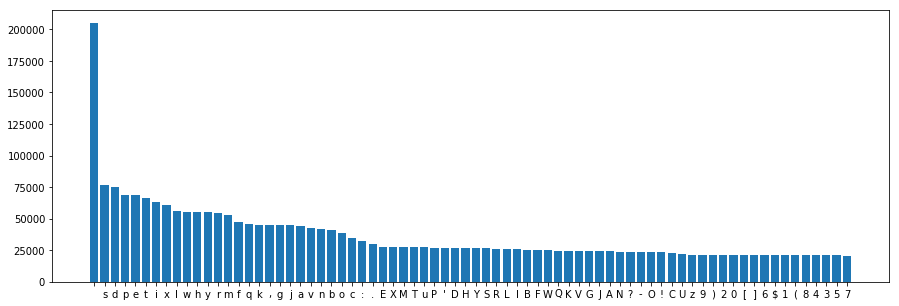

In [12]:
plain_char_cntr = Counter(''.join(df_level_2['ciphertext'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values)
plt.xticks(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Letter'].values)
plt.show()

Seems like it's the same repartition as level 1!

### Ciphered text level 3

In [13]:
for i in range(8):
    try:
        print(df_level_3.ciphertext[i], '\n')
    except KeyError:
        pass

11241 14155 31264 11448 35128 46135 39409 32012 43001 47063 15879 10870 18731 614 40468 35867 22996 49383 44340 20566 28468 43330 3483 25600 2914 22180 1083 21262 5027 42838 9173 50315 15025 20295 41880 42445 43184 5801 16546 36207 24521 20999 43039 19774 8392 30628 42985 15794 32258 21405 43909 5669 527 18854 9038 32234 3941 43184 43413 50297 37659 34797 16929 43083 46269 6748 30744 30621 6777 49983 7250 5745 649 28531 43154 13969 5105 31334 19249 3641 26546 47483 34400 26347 3803 28589 35550 32923 40469 46235 27404 25328 32909 43240 44231 1937 2986 47483 10287 2309 

26313 3720 42782 43095 15349 49837 45407 34248 21099 43359 37032 14760 43236 10848 16272 35764 35411 34796 540 1278 41754 31261 36252 21154 2329 12455 17381 31416 12427 29160 7198 1570 18667 24745 6359 21313 19453 44281 24980 5393 4116 8196 35178 1855 21370 21885 44254 31261 48361 27993 33930 5063 10485 44280 49746 44474 46424 49125 6710 29025 47484 45471 39326 25800 21351 3890 13936 43200 45741 17949 27459 2380 29947 39

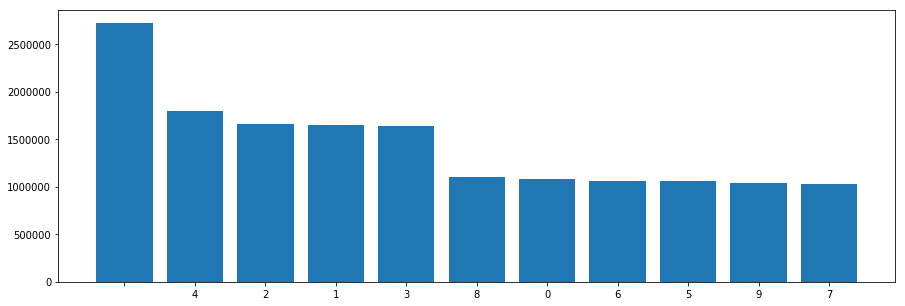

In [14]:
plain_char_cntr = Counter(''.join(df_level_3['ciphertext'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values)
plt.xticks(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Letter'].values)
plt.show()

Only digits, but nothing to add...

### Ciphered text level 4

In [15]:
for i in range(3):
    try:
        print(df_level_4.ciphertext[i], '\n')
    except KeyError:
        pass

Ah1QtVkLNcx7Q6mgvleEAqFIzyZoYkVtiKnd2Yy2t2GmoT4FkAHmS4YCE8n6IRobTMyu6PnCY919kB/UtA0/gg9qYQtIZxM9z/bKvA213y1/EbefjCdeeKBHgkK7821cwVIqGRGBC8l/ZIOG5cBM1c8fBomvbAFHjady66qNr4YRzD9y+GaCRUXYgboj4ZMgf3K/yM9czB5zXCjJnvu9jSRHzjyvDVYQJTuTMapi6WsOpIOsZMPOEIWCv/vltc/F+dxmU0gogWc0ciYjK7vxhed8wujGMnv0dbCrYJrbI0NxCjOejPyvKjwmdmCrILKbXdCeKY1+Z8WKi1kHsJYyoLsON7jfPZjvh0GYQ/OpC3tj0Qa/ua6uLpXeUlPMYqqk33wdNVtbWsme9l2I8zzsPZz9DMMtQkH/DGVRmkOvxjO337fk4DF+099CCSYnKNTT5t+JcsztC98nS1jLRpCboYY/TJOKJyga1noFi/VSHx8oVbluQivsNLfR+CBWMFSJiFlWfRXb49RN/PkhOpvs0TsWyuAfgoMcnocrg+/muj3N0vszPIECb6Ihe5v3eDSJRMx1JfueYZHU2j4R2fbJcgN2uTeP7OoWvCVfQbrOrLDc7nwtLW9OJYtqpY8I8u2WoGRSp/b3z334QkjjiPTNGflX6DE10oUqY2BaHsJ8Vi97popzxpGPTGjDr2kTvGhgEMgQb5WQSQwiBZOi5q3LTcFFKHz8cMkxk8Uc2IVxyKkuboCynt13Rj0TOeU= 

BxBYt00fPc5zQqmls1mAFrVIzihsdFdoiKjdzZ22tWOnoTwGkRnkXIILBs74MxESXsy26vvbY9drlBnNsQgtgAp+Zg9fahMvy/TavQikyyB7HLmMmCdZfLRVhkS783lIxVwrGwaTDcZ+b5OV48xK3M8fBIeseRVGjKl9/LKLp4AGyC51/2iXQ1Hejb0y4YMgf3SqwtlbzxxlWDDJlPeuizJEyjy6BkIZJyyYM7Nj7

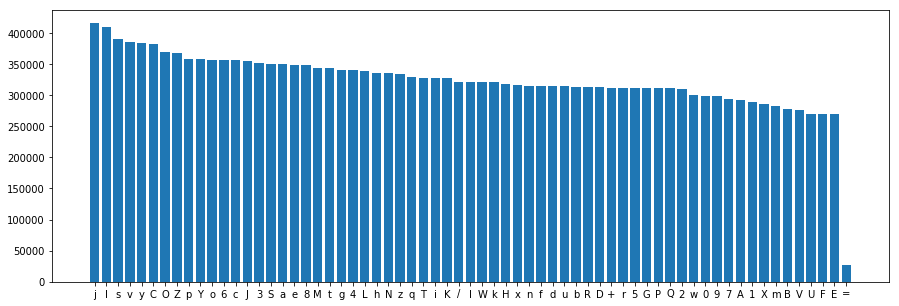

In [16]:
plain_char_cntr = Counter(''.join(df_level_4['ciphertext'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values)
plt.xticks(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Letter'].values)
plt.show()

All caracters seem to be roughly as frequent (except the '='), but again not many things to say

## Try to decypher the first level

### Frequency Analysis

The most natural thing to do now is to look try to find a match between caracters, ie an "a" becomes an "s", a "b" becomes a "k" etc.
This can be done by frequency analysis, and that's what wa gonna do now.

In [17]:
plain_char_cntr = Counter(''.join(train_df['text'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

In [18]:
plain_char_test = Counter(''.join(df_level_1['ciphertext'].values))
plain_stats_test = pd.DataFrame([[x[0], x[1]] for x in plain_char_test.items()], columns=['Letter', 'Frequency'])
plain_stats_test = plain_stats_test.sort_values(by='Frequency', ascending=False)
plain_stats_test['Frequency'] -= 21130 # to remove the influence of random padding caracters

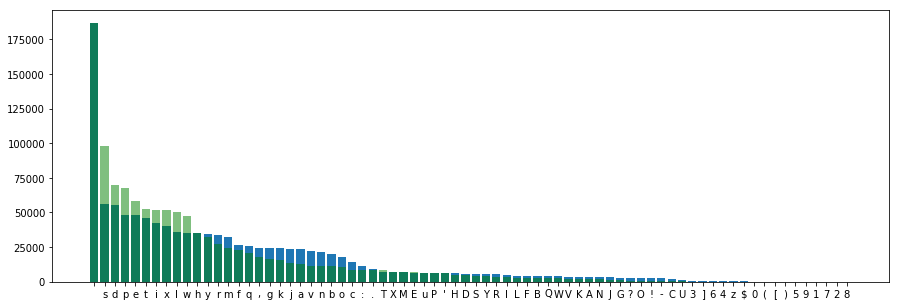

In [19]:
f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_test))) + 0.5, plain_stats_test['Frequency'].values)
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values//4, alpha=.5,color='green')
plt.xticks(np.array(range(len(plain_stats_test))) + 0.5, plain_stats_test['Letter'].values)
plt.show()

We can see that there is **not** a match between letters, meaning that there is no 
direct correspondance between caracters. We have to try something else. 

### One basic trick

In [20]:
# first trick: use the length of some text pieces to understand the first cypher level
df_level_1.length.sort_values(ascending=False).head()

# we can see that 1 piece of text is of len 500, meaning that its original length is between 
# 401 and 500 (recall that every original piece of text is padded with random caracters to
# the next hundred)

45272    500
95019    400
91852    300
94408    300
35086    300
Name: length, dtype: int64

In [21]:
df_level_1.length.describe([.999])

count    27158.000000
mean       100.187790
std          5.591441
min        100.000000
50%        100.000000
99.9%      200.000000
max        500.000000
Name: length, dtype: float64

We can see that the crushing majority of samples are 100 caracters long, meaning that their length is between 1 and 100 and they're padded to the next hundred. But even if long samples (> 100 caracters) are rare, they will be very interesting!

In [22]:
# and here is the corresponding text
df_level_1.loc[45272].ciphertext

"gQUXDoBshspv: Tmfih sdycopxi, raydctrv, ssid sis Pkoihlpr, Bndh  Cyksh, Flvjdd, GHYYQTQ, YSHEAPA vtxw gtw cydwwyw'w  islju, RGJUNWO, jva Reawicdy ftydmdf rvtyf  wjyyhxmr-fevww und xwd nlhhextmtrv-ftjjr, fltm  qskq Ysqkpqtm mipqtrv y nednbd, kmoih vsmrg flt  Cggwdew ee Ysheapa, fahcnfltq, mipqtrv ssi rgtps  qtgwkk lpatxtc tr p llrjkp,  edc n., xhytr qndrt ak e  Byod, jgpr unwpeve xwd Xehbsmempwi Cavidf, xwd  axwdd kecxsjgpv, pmo Ppctii. Ssi jqasf olwi nygt ymsks flt rfevd, lrs Flvjdd wfdloizmXnS8"

In [23]:
# then we look in the training data to find the passage with the corresponding length
matching_pieces = train_df[(train_df.length>=401) & (train_df.length<=500)]
matching_pieces
# only three unciphered texts length are in the interval: let's print them

plaintext_id                                               text  \
13862   ID_f000cad17  Porter: Enter trumpets, sounding, then two Ald...   
67817   ID_083ddb1e0  Solemn music. Enter, as in an apparition,  SIC...   
104540  ID_a1b257ad8  GOWER: Enter, PERICLES and SIMONIDES at one do...   

        index  length  
13862   43382     488  
67817   31644     423  
104540  76893     413

In [24]:
matching_pieces.text.values

array(["Porter: Enter trumpets, sounding, then two Aldermen, Lord  Mayor, Garter, CRANMER, NORFOLK with his marshal's  staff, SUFFOLK, two Noblemen bearing great  standing-bowls for the christening-gifts, then  four Noblemen bearing a canopy, under which the  Duchess of Norfolk, godmother, bearing the child  richly habited in a mantle,  and c., train borne by a  Lady, then follows the Marchioness Dorset, the  other godmother, and Ladies. The troop pass once about the stage, and Garter speaks",
       'Solemn music. Enter, as in an apparition,  SICILIUS LEONATUS, father to Posthumus Leonatus,  an old man, attired like a warrior, leading in  his hand an ancient matron, his wife, and mother  to Posthumus Leonatus, with music before them:  then, after other music, follow the two young  Leonati, brothers to Posthumus Leonatus, with  wounds as they died in the wars. They circle Posthumus Leonatus round, as he lies sleeping',
       'GOWER: Enter, PERICLES and SIMONIDES at one door, with  Att

#### If you look carefully to the spaces, dots, columns etc., you will soon understand that our ciphered text matches the first plain text: we found our first match. Now let's try to understand some properties of the first cipher level

In [25]:
print('Unciphered text:\n', train_df.loc[13862].text, '\n\nCiphered text (level 1):\n', 
      df_level_1.loc[45272].ciphertext)

Unciphered text:
 Porter: Enter trumpets, sounding, then two Aldermen, Lord  Mayor, Garter, CRANMER, NORFOLK with his marshal's  staff, SUFFOLK, two Noblemen bearing great  standing-bowls for the christening-gifts, then  four Noblemen bearing a canopy, under which the  Duchess of Norfolk, godmother, bearing the child  richly habited in a mantle,  and c., train borne by a  Lady, then follows the Marchioness Dorset, the  other godmother, and Ladies. The troop pass once about the stage, and Garter speaks 

Ciphered text (level 1):
 gQUXDoBshspv: Tmfih sdycopxi, raydctrv, ssid sis Pkoihlpr, Bndh  Cyksh, Flvjdd, GHYYQTQ, YSHEAPA vtxw gtw cydwwyw'w  islju, RGJUNWO, jva Reawicdy ftydmdf rvtyf  wjyyhxmr-fevww und xwd nlhhextmtrv-ftjjr, fltm  qskq Ysqkpqtm mipqtrv y nednbd, kmoih vsmrg flt  Cggwdew ee Ysheapa, fahcnfltq, mipqtrv ssi rgtps  qtgwkk lpatxtc tr p llrjkp,  edc n., xhytr qndrt ak e  Byod, jgpr unwpeve xwd Xehbsmempwi Cavidf, xwd  axwdd kecxsjgpv, pmo Ppctii. Ssi jqasf olwi nygt ymsks

__It is now obvious that 1st level cipher preserves the punctuation and the case 
(uppercase and lowercase match), which is already a good hint.
What is also striking is that the length of the words is preserved.__

__The 1st difficulty arises tho: words are not ciphered the same way: 'and' is either 'edc' or 'lrs'
so its is not a basic matching between caracters...__

In [26]:
# Let's do the same thing for a second piece of text now.
# With the same procedure, we get a second match:
print(train_df.loc[6938].text, '\n\n', df_level_1.loc[95019].ciphertext)

Enter, from one side, LUCIUS, IACHIMO, and  the Roman Army: from the other side, the  British Army, POSTHUMUS LEONATUS following,  like a poor soldier. They march over and go  out. Then enter again, in skirmish, IACHIMO  and POSTHUMUS LEONATUS he vanquisheth and disarmeth IACHIMO, and then leaves him 

 9]8bAdM4y,HpY6[JRxz4V2dLHy[nz[LI0AJn5?U62T?'.0WabIdspv, uqaq emp wxcp, PKBTYI, HLGWHXS, pmo  xwd Dscyy Ehlk: jhnx xwd axwdd wxcp, xwd  Mvxstww Ydqo, OAWJGGQKR WIEMLXKR qsbkabxmr,  pxjp e fnav inwhxdd. Xwdk qpqnl eupv pmo ke  ngx. Jgpr tmfih yrexm, tr ijtvchel, XYNLXLA  edc BSISSYCTE PTNYEJTE lt ulrgttwwdfl pmo hxrlvcdfl XYNLXLA, edc fltm wipupw whxagksdMpX4mbWPz]sDwXHhA2CQB!)9dp(Xx($SPd'c]vxT6a58k


So this is another example of two matching passages. I'll now let you find other tricks, and
I'll post the follow-up soon with the main trick for cipher 1! 
Don't forget to upvote if you find this kernel useful! ;)